# Overview
- In this notebook, we read in each of the images from the already preprocessed image directory, extract multiple cheek patches of image pixels, and then average their intensities to get a read on the facial skin tone
- Output is then saved into a csv file

Notes:
- 39 is left inside eye
- 36 is left outside eye
- 42 is right inside eye
- 45 is right outside eye

In [1]:
import numpy as np
import dlib
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

def load_pretrained_models(face_detector=dlib.get_frontal_face_detector(),
                           facial_landmark_predictor=dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat'),
                           key_landmark_indices=pd.read_csv('models/dlib_pred_key_landmarks.csv', index_col='model')):
    """
    Import face detection and facial landmark detection models; Import indices corresponding to
    specified landmark detection model that represent key facial landmarks to be used for facial alignment
    """
    
    detector =  face_detector
    predictor =  facial_landmark_predictor
    
    face_center = key_landmark_indices.loc['dlib']['face_center']
    left_eye = key_landmark_indices.loc['dlib']['left_eye']
    right_eye = key_landmark_indices.loc['dlib']['right_eye']
    landmark_count = key_landmark_indices.loc['dlib']['landmark_count']
    
    return detector, predictor, face_center, left_eye, right_eye, landmark_count

detector, predictor, face_center, left_eye,right_eye, landmark_count = load_pretrained_models()

In [142]:
directory = 'data/celeba_aligned_cropped/'
image = os.listdir('data/celeba_aligned_cropped')[48]
image_resized = cv2.imread(directory+'000001.jpg', cv2.IMREAD_COLOR)


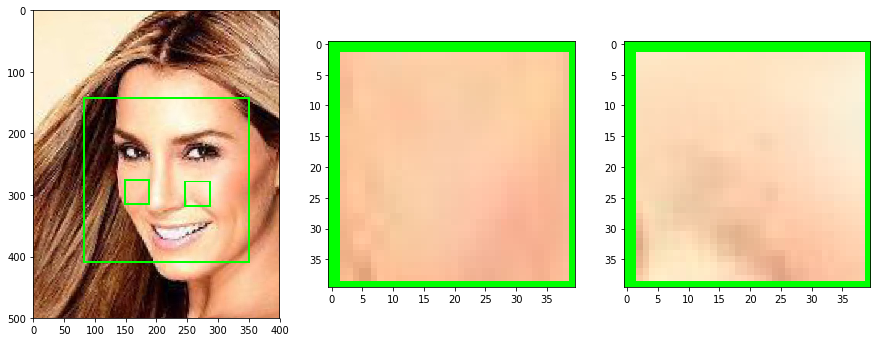

In [143]:
def face_landmark_detection(image_resized, face_detector=detector,
                            facial_landmark_predictor=predictor, landmark_count=landmark_count,
                            show_image=True):
    
    """
    Detect face, identify facial landmarks, and display image
    with bounding box and landmark annotations (OPTIONAL)
    """
    
    image_ready = image_resized.copy()

    
    # DETECT FACE
    rect = face_detector(image_ready, 1) # detect the face
    if len(rect) == 0:
        print("No Face Detected")
        return # if no face is detected, return
    rect = rect[0]
    (x, y, h, w) = (rect.left(), rect.top(),
                    rect.right() - rect.left(), rect.bottom() - rect.top()) # get bounding box coordinates
    cv2.rectangle(image_ready, (x, y), (x + w, y + h), (0, 255, 0), 2) # display bounding box

    
    # IDENTIFY FACIAL LANDMARKS
    shape = facial_landmark_predictor(image_ready, rect) # predict all facial landmarks
    facial_landmarks = np.ones((landmark_count,2), dtype=int)
    for i in range(landmark_count):
        facial_landmarks[i] = [shape.part(i).x, shape.part(i).y] # convert facial landmarks to numpy array
#     (x, y) = facial_landmarks[36]
#     cv2.circle(image_ready, (x, y), 1, (0, 0, 255), -1) # annotate landmarks on image
    
    (a, b) = facial_landmarks[36]
    (c, d) = facial_landmarks[39]
    (f, g) = facial_landmarks[30]
    h = int((g + b) / 2)
    cv2.rectangle(image_ready, (a, h), (a + 40, h + 40), (0, 255, 0), 2) # display bounding box
    
    (j, k) = facial_landmarks[42]
    (m, n) = facial_landmarks[45]
    (o, p) = facial_landmarks[30]
    q = int((p + k) / 2)
    cv2.rectangle(image_ready, (j, q), (j + 40, q + 40), (0, 255, 0), 2) # display bounding box
        
    
    
    # DISPLAY IMAGE
    if show_image == True:
        display_image = cv2.cvtColor(image_ready, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(15, 12))
        plt.subplot(1,3,1)
        plt.imshow(display_image)
    plt.subplot(1,3,2)    
    plt.imshow(display_image[h:h+40,a:a+40])
    plt.subplot(1,3,3)    
    plt.imshow(display_image[q:q+40,j:j+40])
    
face_landmark_detection(image_resized, show_image=True)

273


192.08760416666667

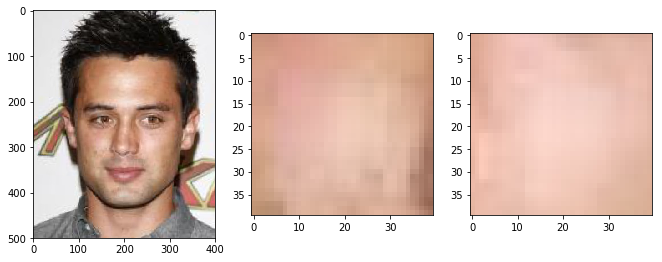

In [168]:
def face_landmark_detection(image_resized, face_detector=detector,
                            facial_landmark_predictor=predictor, landmark_count=landmark_count,
                            show_image=True):
    
    """
    Detect face, identify facial landmarks, and display image
    with bounding box and landmark annotations (OPTIONAL)
    """
    
    image_ready = image_resized.copy()

    
    # DETECT FACE
    rect = face_detector(image_ready, 1) # detect the face
    if len(rect) == 0:
        print("No Face Detected")
        return # if no face is detected, return
    rect = rect[0]

    
    # IDENTIFY FACIAL LANDMARKS
    shape = facial_landmark_predictor(image_ready, rect) # predict all facial landmarks
    facial_landmarks = np.ones((landmark_count,2), dtype=int)
    for i in range(landmark_count):
        facial_landmarks[i] = [shape.part(i).x, shape.part(i).y] # convert facial landmarks to numpy array
    
    (a, b) = facial_landmarks[36]
    (c, d) = facial_landmarks[39]
    (f, g) = facial_landmarks[30]
    h = int((g + b) / 2)
    
    (j, k) = facial_landmarks[42]
    (m, n) = facial_landmarks[45]
    (o, p) = facial_landmarks[30]
    q = int((p + k) / 2)

    

    
    
    # DISPLAY IMAGE
    if show_image == True:
        display_image = cv2.cvtColor(image_ready, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(15, 12))
        plt.subplot(1,4,1)
        plt.imshow(display_image)
    plt.subplot(1,4,2)    
    plt.imshow(display_image[h:h+40,a:a+40])
    plt.subplot(1,4,3)    
    plt.imshow(display_image[q:q+40,j:j+40])


    
    print(q)
    left_patch = np.array(display_image[h:h+40,a:a+40])
    right_patch = np.array(display_image[q:q+40,j:j+40])
    return ((left_patch.mean() + right_patch.mean())/2)

    
face_landmark_detection(image_resized, show_image=True)


In [175]:
def skin_color_detection(image_resized, face_detector=detector,
                            facial_landmark_predictor=predictor, landmark_count=landmark_count,
                            show_image=True):
    
    """
    Detect face, identify facial landmarks, and display image
    with bounding box and landmark annotations (OPTIONAL)
    """
    
    image_ready = image_resized.copy()

    
    # DETECT FACE
    rect = face_detector(image_ready, 1) # detect the face
    if len(rect) == 0: # if no face is detected, return
        return np.nan
    rect = rect[0]

    
    # IDENTIFY FACIAL LANDMARKS
    shape = facial_landmark_predictor(image_ready, rect) # predict all facial landmarks
    facial_landmarks = np.ones((landmark_count,2), dtype=int)
    for i in range(landmark_count):
        facial_landmarks[i] = [shape.part(i).x, shape.part(i).y] # convert facial landmarks to numpy array
    
    (a, b) = facial_landmarks[36]
    (c, d) = facial_landmarks[39]
    (f, g) = facial_landmarks[30]
    h = int((g + b) / 2)
    
    (j, k) = facial_landmarks[42]
    (m, n) = facial_landmarks[45]
    (o, p) = facial_landmarks[30]
    q = int((p + k) / 2)


    display_image = cv2.cvtColor(image_ready, cv2.COLOR_BGR2RGB)

    
    left_patch = np.array(display_image[h:h+40,a:a+40])
    right_patch = np.array(display_image[q:q+40,j:j+40])
    return ((left_patch.mean() + right_patch.mean())/2)

    
skin_color_detection(image_resized, show_image=True)


192.08760416666667

# Image processing

In [179]:
directory = 'data/celeba_aligned_cropped'
skin_tone = np.zeros((len(os.listdir(directory))))
for i, image in enumerate(os.listdir(directory)):
    image_resized = cv2.imread(directory+"/"+image, cv2.IMREAD_COLOR)

    skin_tone[i] = skin_color_detection(image_resized)
    
    if i % 10000 == 0:
        print(i)
        np.save("skin_tone", skin_tone)
        
np.save("data/skin_tone", skin_tone)

skin_tone = np.load("data/skin_tone.npy")

skin_tone_df = pd.DataFrame(skin_tone, columns=['Skin_tone'],
                            index=os.listdir('data/celeba_aligned_cropped'))
skin_tone_df.to_csv('data/skin_tone_df.csv')

0
10000
20000
30000
40000
50000
60000
70000
80000


C:\Users\RHedg\.conda\envs\opencv\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
C:\Users\RHedg\.conda\envs\opencv\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
